Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

Load dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')

Get null value details

In [3]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
# Categorial
df.fillna({'director': 'Unknown'}, inplace=True)
df.fillna({'cast': 'Unknown'}, inplace=True)
df.fillna({'country': 'Unknown'}, inplace=True)

#1 Handle null values with mode imputation
df.fillna({'date_added': df['date_added'].mode()[0]}, inplace=True)

#2 Clean the column by removing leading/trailing whitespace
df['date_added'] = df['date_added'].str.strip()

# 3 Convert the strings to actual datetime objects first
df['date_added'] = pd.to_datetime(df['date_added'])

# This creates a Series of only the rows that failed to convert
#problematic_rows = df[pd.to_datetime(df['date_added'], errors='coerce').isna()]
#print(problematic_rows['date_added'])

df_genres = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
df_genres['listed_in'] = df_genres['listed_in'].str.strip()
print(df_genres['listed_in'].value_counts().head(20))

df_countries = df.assign(country=df['country'].str.split(', ')).explode('country')
df_countries['country'] = df_countries['country'].str.strip()

# Numerical
df.fillna({'rating': df['rating'].mode()[0]}, inplace=True)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


In [5]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


In [6]:
null_row_indices = np.where(df.isnull().any(axis=1))[0]
print(null_row_indices)

df.dropna(subset=['duration'], inplace=True)
print(df.isnull().sum())  # more preffered method df.isna().sum()

# Check the type of the duration column
print(df['duration'].dtype)

df['duration'] = df['duration'].str.extract('(\d+)').astype('Int64')

print(df['duration'].head(10))
# Now 'duration_value' holds minutes for movies and seasons for shows

# Convert duration to numeric (handling 'min' and 'Seasons' separately)
# Create a flag for type, as 'duration' is not a single comparable numeric feature
df['is_movie'] = df['type'] == 'Movie'
movies_df = df[df['type'] == 'Movie'].copy()
# Extracting the numerical duration in minutes
movies_df['duration_min'] = movies_df['duration'].astype(float)
# For TV shows, a single 'duration' number isn't meaningful for a heatmap

[5541 5794 5813]
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
object
0     90
1      2
2      1
3      1
4      2
5      1
6     91
7    125
8      9
9    104
Name: duration, dtype: Int64


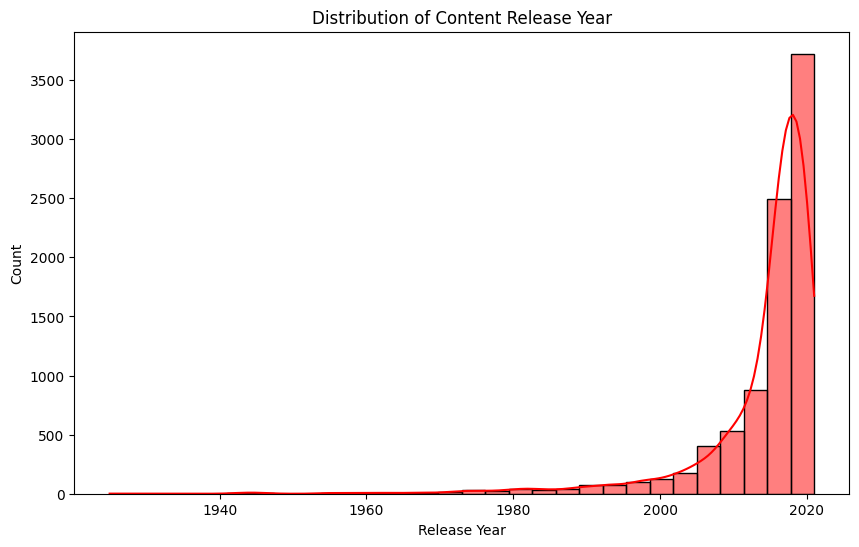

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='red')
plt.title('Distribution of Content Release Year')
plt.xlabel('Release Year')
plt.show()

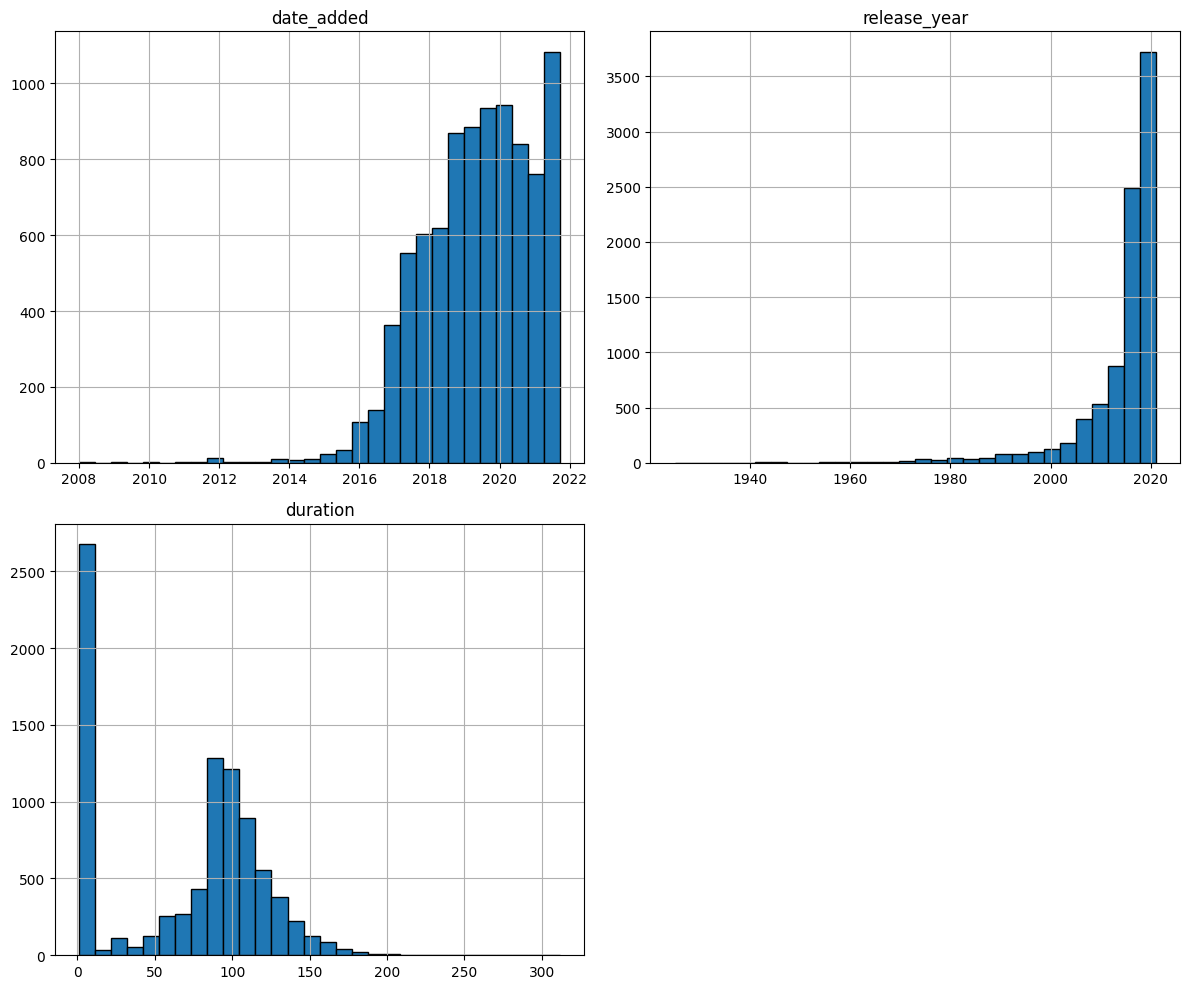

In [8]:
# Plot all numerical features in a grid
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.title('All numerical features')
plt.tight_layout()
plt.show()

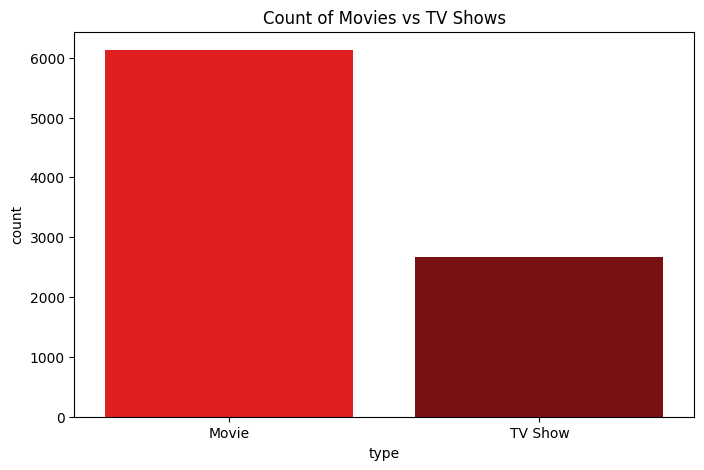

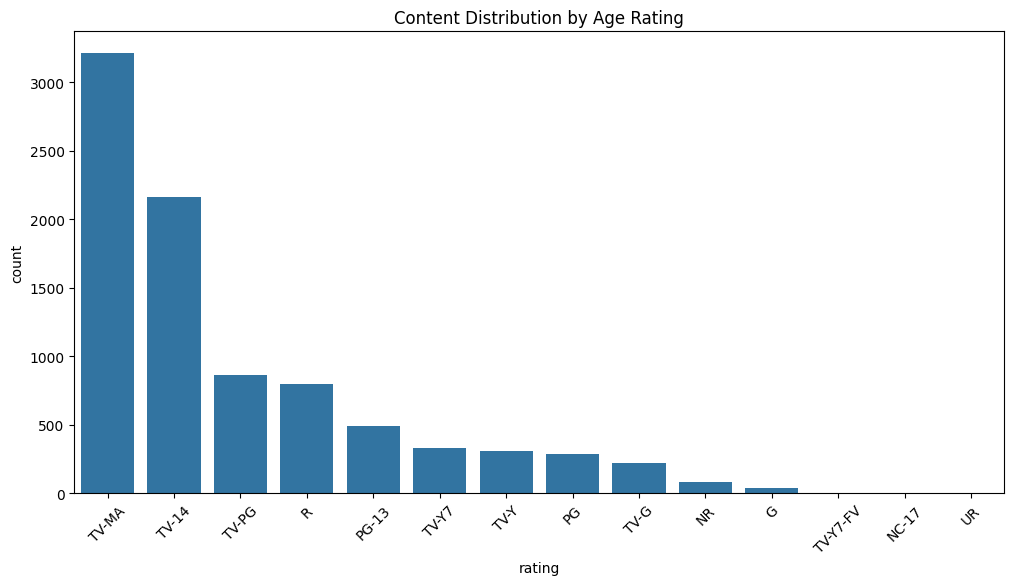

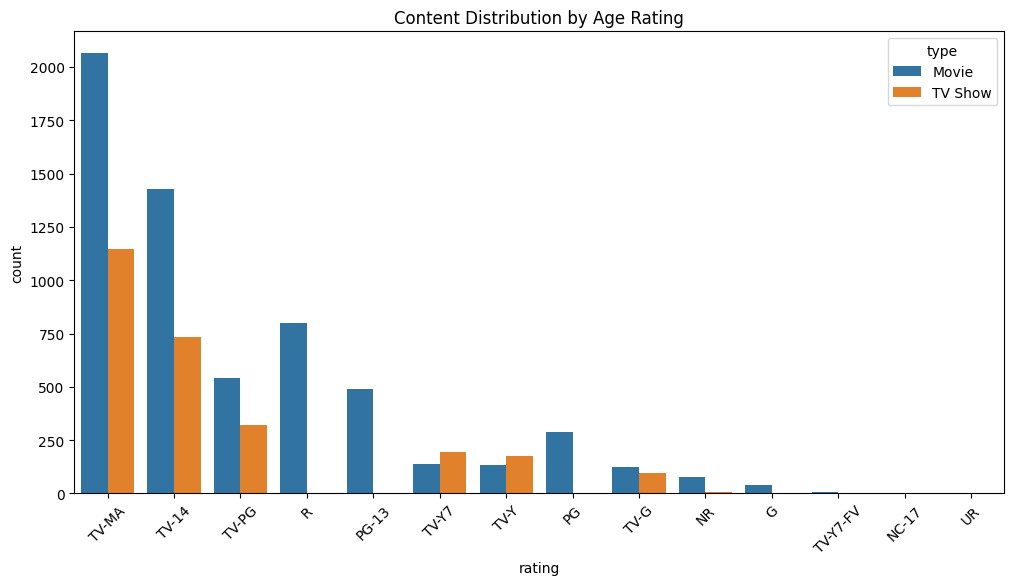

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='type', palette=['red', 'darkred'])
plt.title('Count of Movies vs TV Shows')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Content Distribution by Age Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Content Distribution by Age Rating')
plt.xticks(rotation=45)
plt.show()

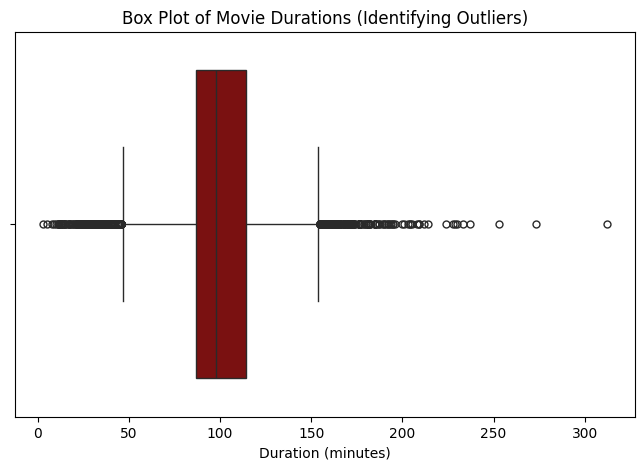

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=movies_df['duration_min'], color='darkred', fliersize=5)
plt.title('Box Plot of Movie Durations (Identifying Outliers)')
plt.xlabel('Duration (minutes)')
plt.show()

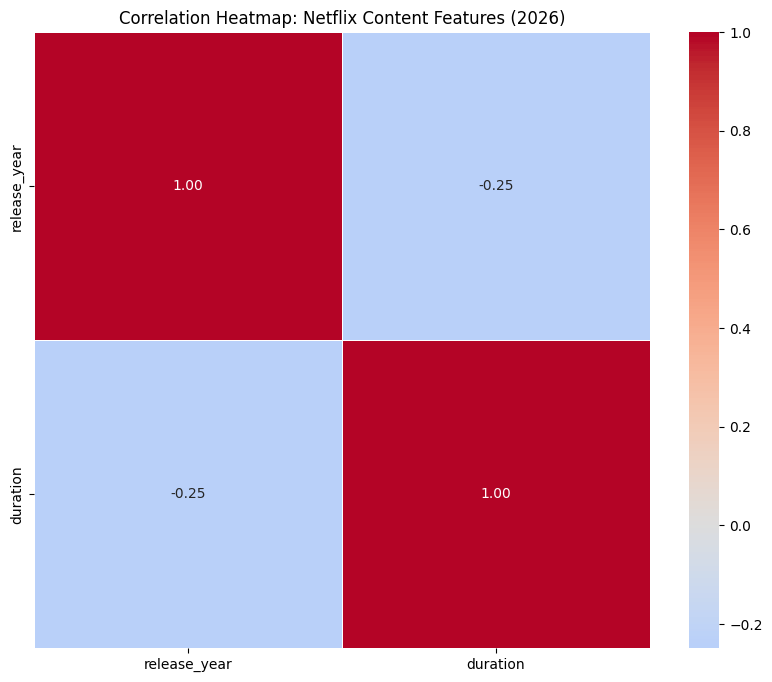

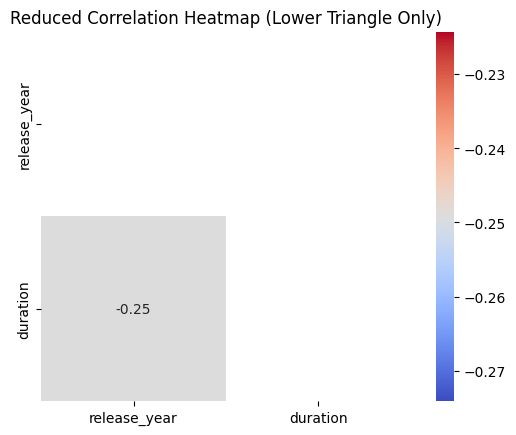

              release_year  duration
release_year      1.000000 -0.249182
duration         -0.249182  1.000000


In [11]:
# 1. Select numerical features
# Common features: release_year, duration_num, and added IMDb scores if available
netflix_numeric = df.select_dtypes(include=[np.number])

# 2. Compute Correlation Matrix
corr_matrix = netflix_numeric.corr()

# 3. Plot Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle for clarity

sns.heatmap(corr_matrix,
            annot=True,  # Shows the correlation coefficients in each cell
            fmt=".2f",  # Rounds numbers to 2 decimal places
            cmap='coolwarm',  # Diverging palette (red for positive, blue for negative)
            center=0,  # Centers the colorbar at 0
            square=True,  # Makes cells square
            linewidths=0.5)  # Adds lines between cells for better readability

plt.title('Correlation Heatmap: Netflix Content Features (2026)')
plt.show()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.title('Reduced Correlation Heatmap (Lower Triangle Only)')
plt.show()

print(corr_matrix)